In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
train_df = pd.read_csv("/content/drive/MyDrive/Datasets/p1/train_data.csv")
test_df = pd.read_csv("/content/drive/MyDrive/Datasets/p1/test_data.csv")

In [2]:
train_df.columns

Index(['Unnamed: 0', 'Sample Name', 'Sample ID', 'Perimeter', 'Filled Area',
       'Convex Area', 'Equivalent Radius', 'Extent', 'Points of Extremum',
       'Compactness', 'Diameter', 'Direction', 'Length of Major Axis',
       'Length of Minor Axis', 'Bordered Area 1', 'Bordered Area 2',
       'Bordered Area 3', 'Bordered Area 4', 'Centroid 1', 'Centroid 2',
       'Convex Hull 1', 'Convex Hull 2', 'Convex Hull 3', 'Convex Hull 4',
       'Bacteria'],
      dtype='object')

In [3]:
train_df.head()

,Unnamed: 0,Sample Name,Sample ID,Perimeter,Filled Area,Convex Area,Equivalent Radius,Extent,Points of Extremum,Compactness,...,Bordered Area 2,Bordered Area 3,Bordered Area 4,Centroid 1,Centroid 2,Convex Hull 1,Convex Hull 2,Convex Hull 3,Convex Hull 4,Bacteria
0,0,Cepheus_01010101,1010101,1.010,0.2030,0.15400,1.6850,1.57,19.10,5.23,...,1.64,2.060,4.930,18.30,3.61,18.80,18.80,18.80,18.70,Raizovox
1,1,Cepheus_01010102,1010102,0.209,0.1270,0.02860,1.2450,11.70,10.90,15.70,...,15.30,0.633,1.210,10.70,15.90,10.60,10.60,10.70,10.50,Raizovox
2,2,Cepheus_01010103,1010103,0.178,0.0261,0.01370,0.5850,5.45,2.19,7.66,...,18.90,0.561,0.671,1.79,19.10,1.87,1.87,1.78,1.78,Raizovox
3,3,Cepheus_01010104,1010104,0.100,0.0108,0.00416,0.3715,4.82,8.37,10.80,...,10.10,0.403,0.441,8.03,10.20,7.98,7.98,8.10,8.10,Flitter
4,4,Cepheus_01010105,1010105,3.760,1.4100,1.41000,4.4200,1.95,10.80,3.79,...,13.50,16.400,3.400,9.78,14.90,2.13,2.13,2.13,2.13,Elixoria


In [4]:
# dropping obviosuly useless columns
train_df.drop(columns=["Unnamed: 0", "Sample ID", "Sample Name"], inplace=True)
test_df.drop(columns=["Unnamed: 0", "Sample ID", "Sample Name"], inplace=True)

In [5]:
# checking for nan values
train_df.isnull().sum()

Perimeter               0
Filled Area             0
Convex Area             0
Equivalent Radius       0
Extent                  0
Points of Extremum      0
Compactness             0
Diameter                0
Direction               0
Length of Major Axis    0
Length of Minor Axis    0
Bordered Area 1         0
Bordered Area 2         0
Bordered Area 3         0
Bordered Area 4         0
Centroid 1              0
Centroid 2              0
Convex Hull 1           0
Convex Hull 2           0
Convex Hull 3           0
Convex Hull 4           0
Bacteria                0
dtype: int64

In [6]:
# EDA
train_df.corr()

,Perimeter,Filled Area,Convex Area,Equivalent Radius,Extent,Points of Extremum,Compactness,Diameter,Direction,Length of Major Axis,...,Bordered Area 1,Bordered Area 2,Bordered Area 3,Bordered Area 4,Centroid 1,Centroid 2,Convex Hull 1,Convex Hull 2,Convex Hull 3,Convex Hull 4
Perimeter,1.000000,0.617212,0.616362,0.531869,0.359105,-0.026979,0.093882,0.458702,-0.019958,0.587316,...,0.020209,0.032159,0.578376,0.559845,-0.017889,-0.013576,0.007167,0.013805,0.011482,0.016505
Filled Area,0.617212,1.000000,0.629366,0.529893,0.378818,-0.028978,0.124815,0.454140,-0.026961,0.591901,...,0.029048,0.044311,0.579264,0.565272,-0.017649,-0.016742,0.013993,0.016005,0.024175,0.018792
Convex Area,0.616362,0.629366,1.000000,0.523740,0.385571,-0.027308,0.126475,0.454069,-0.026016,0.600859,...,0.030683,0.047006,0.580893,0.554293,-0.015126,-0.014085,0.015733,0.013550,0.018461,0.022406
Equivalent Radius,0.531869,0.529893,0.523740,1.000000,0.264913,-0.021255,0.026837,0.436284,-0.023432,0.524080,...,-0.001896,0.006733,0.521686,0.515478,-0.014202,-0.015345,-0.007260,-0.008657,-0.009496,-0.001437
Extent,0.359105,0.378818,0.385571,0.264913,1.000000,0.009821,0.317388,0.203484,-0.056611,0.327929,...,0.088678,0.056956,0.296493,0.274090,0.021971,-0.024330,0.070954,0.069162,0.073268,0.083514
Points of Extremum,-0.026979,-0.028978,-0.027308,-0.021255,0.009821,1.000000,0.035918,-0.027440,0.008075,-0.030399,...,0.534118,0.000730,-0.025249,-0.040226,0.546195,0.001990,0.531047,0.537730,0.537254,0.538094
Compactness,0.093882,0.124815,0.126475,0.026837,0.317388,0.035918,1.000000,-0.006402,-0.053620,0.064776,...,0.097890,0.051703,0.041244,0.012643,0.044680,-0.018495,0.085576,0.088845,0.088487,0.091812
Diameter,0.458702,0.454140,0.454069,0.436284,0.203484,-0.027440,-0.006402,1.000000,-0.020310,0.456686,...,-0.004544,-0.004736,0.448360,0.448385,-0.021732,-0.014536,-0.012236,-0.012558,-0.012221,-0.008587
Direction,-0.019958,-0.026961,-0.026016,-0.023432,-0.056611,0.008075,-0.053620,-0.020310,1.000000,-0.021146,...,-0.030633,-0.008588,-0.019113,-0.017851,-0.025674,-0.014609,-0.009426,-0.013316,-0.020424,-0.027051
Length of Major Axis,0.587316,0.591901,0.600859,0.524080,0.327929,-0.030399,0.064776,0.456686,-0.021146,1.000000,...,0.007212,0.029039,0.578965,0.560681,-0.018342,-0.012223,-0.003472,-0.003036,-0.002859,0.004473


In [7]:
y_df = train_df.Bacteria
X_df = train_df.drop(columns=["Bacteria"])

X_df.head()

,Perimeter,Filled Area,Convex Area,Equivalent Radius,Extent,Points of Extremum,Compactness,Diameter,Direction,Length of Major Axis,...,Bordered Area 1,Bordered Area 2,Bordered Area 3,Bordered Area 4,Centroid 1,Centroid 2,Convex Hull 1,Convex Hull 2,Convex Hull 3,Convex Hull 4
0,1.010,0.2030,0.15400,1.6850,1.57,19.10,5.23,12.060,19.5,2.390,...,17.30,1.64,2.060,4.930,18.30,3.61,18.80,18.80,18.80,18.70
1,0.209,0.1270,0.02860,1.2450,11.70,10.90,15.70,7.400,21.8,0.537,...,10.50,15.30,0.633,1.210,10.70,15.90,10.60,10.60,10.70,10.50
2,0.178,0.0261,0.01370,0.5850,5.45,2.19,7.66,3.400,22.8,0.336,...,1.78,18.90,0.561,0.671,1.79,19.10,1.87,1.87,1.78,1.78
3,0.100,0.0108,0.00416,0.3715,4.82,8.37,10.80,0.632,15.7,0.262,...,8.05,10.10,0.403,0.441,8.03,10.20,7.98,7.98,8.10,8.10
4,3.760,1.4100,1.41000,4.4200,1.95,10.80,3.79,10.780,12.2,10.600,...,2.13,13.50,16.400,3.400,9.78,14.90,2.13,2.13,2.13,2.13


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
sns.set_context('talk')
y_df.value_counts()

Charmayanne    9375
Raizovox       9368
Flitter        9350
Cruor          9292
Myaree         9278
Onyxium        9243
Elixoria       9204
Potentiopus    9195
Gelledius      9166
Name: Bacteria, dtype: int64

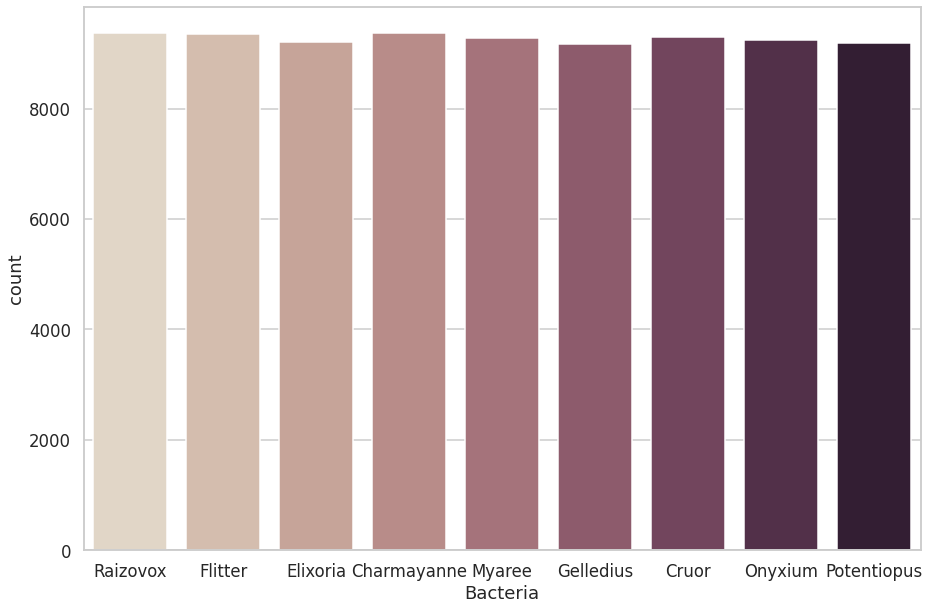

In [9]:
fig, ax=plt.subplots(1,1,figsize=(15,10))
_ = sns.countplot(x='Bacteria', data=train_df, ax=ax, palette="ch:.25")

Balanced dataset, thank god XD

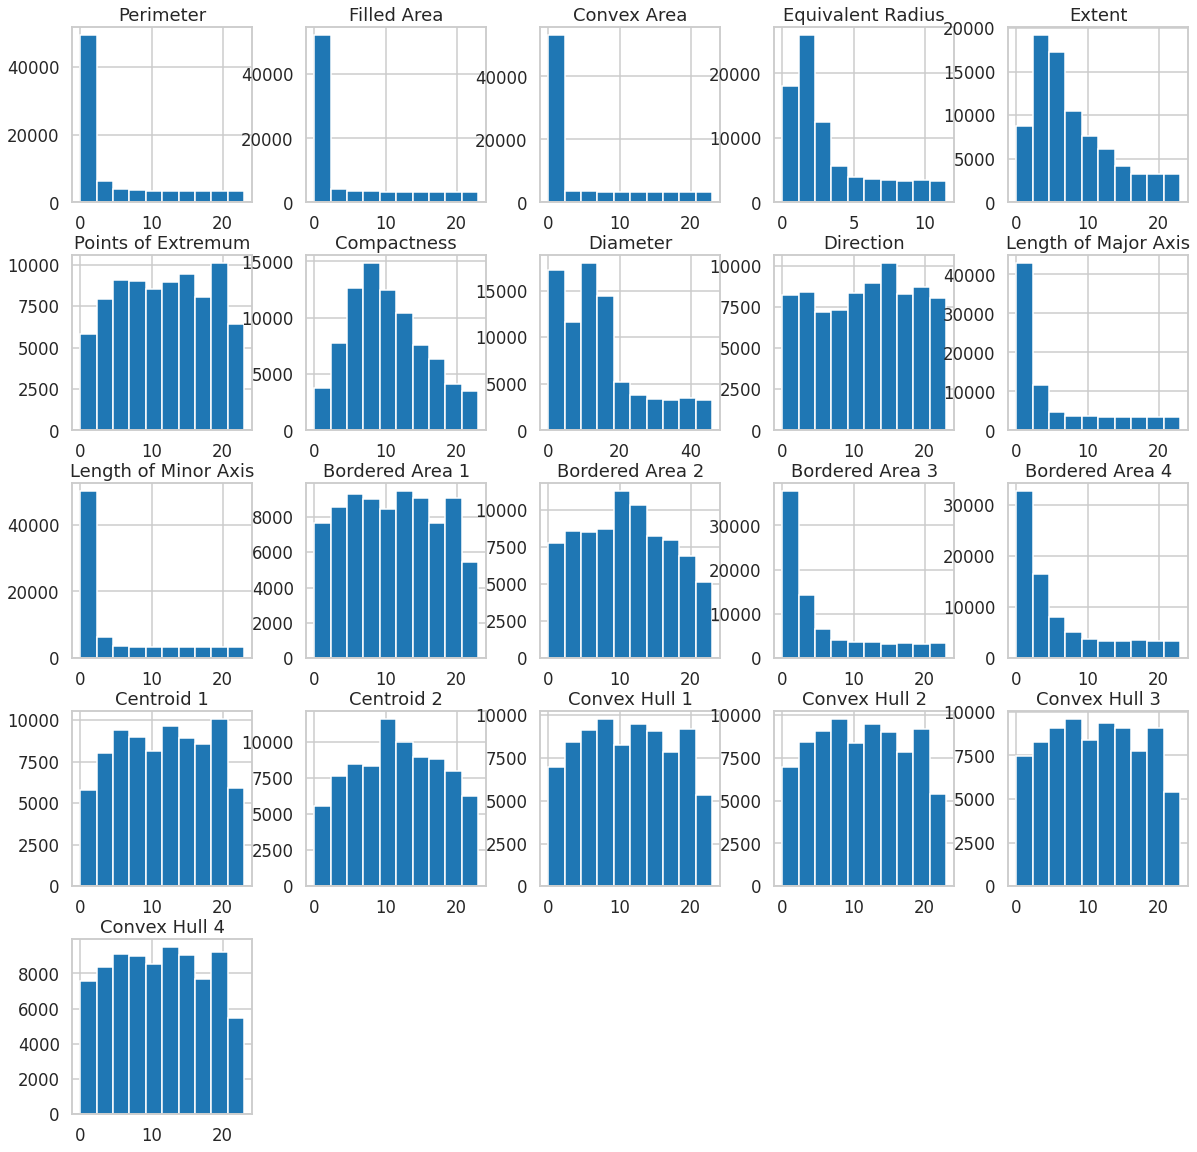

In [10]:
train_df.hist(figsize=(20,20))
plt.show()

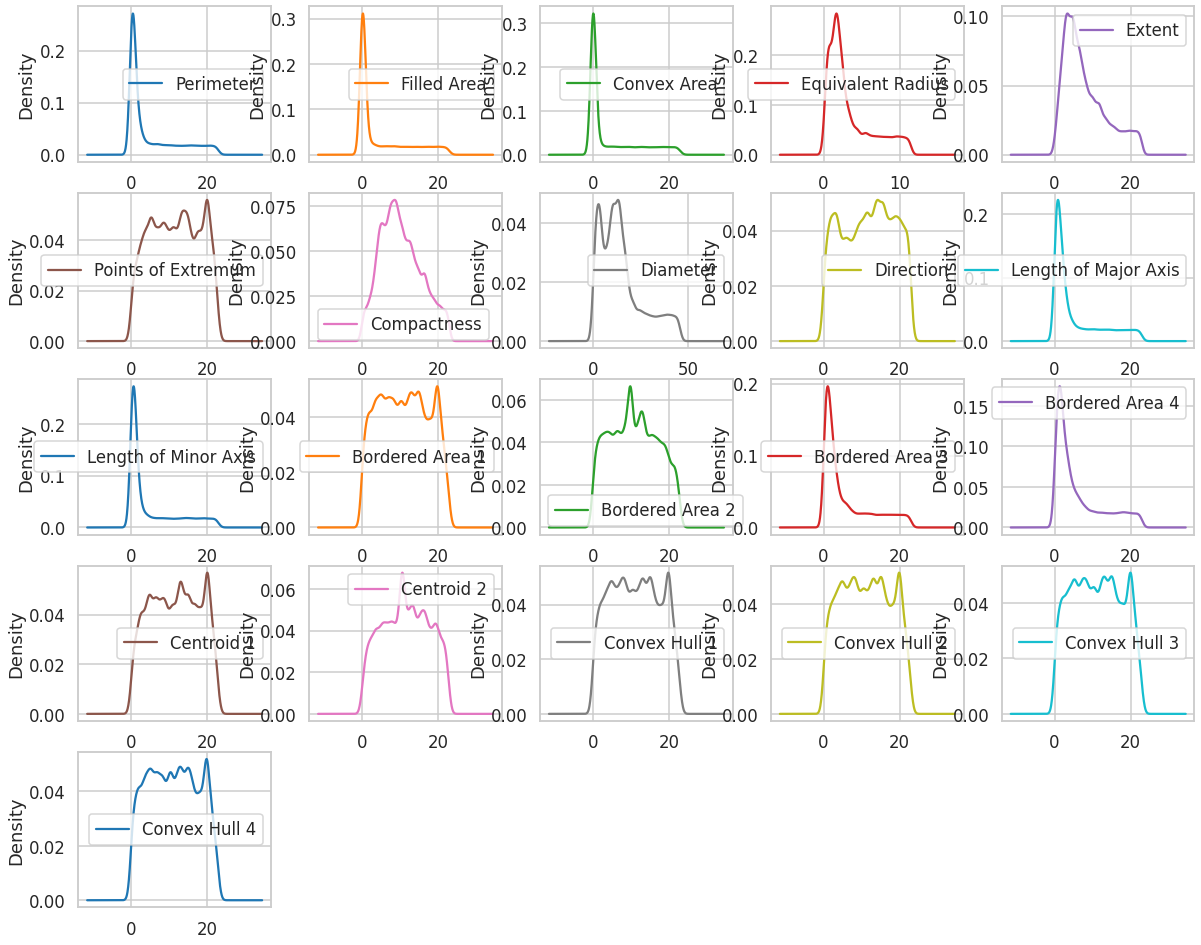

In [11]:
train_df.plot(kind="density", layout=(6,5), 
             subplots=True,sharex=False, sharey=False, figsize=(20, 20))
plt.show()

Some of these distributions are extremely similar, but the correlation is only 0.5x?

Let's perform featurewise visualization

In [12]:
def plot_feature(dataset, feature):
    fig, ax=plt.subplots(1,2,figsize=(25,10))
    _ = sns.boxplot(x="Bacteria", y=feature, data=dataset, palette="ch:.25", ax=ax[0])
    _ = sns.violinplot(data=dataset,x="Bacteria", y=feature, ax=ax[1], palette="ch:.25", inner="quart")
    plt.xticks(rotation=90)
    plt.show()

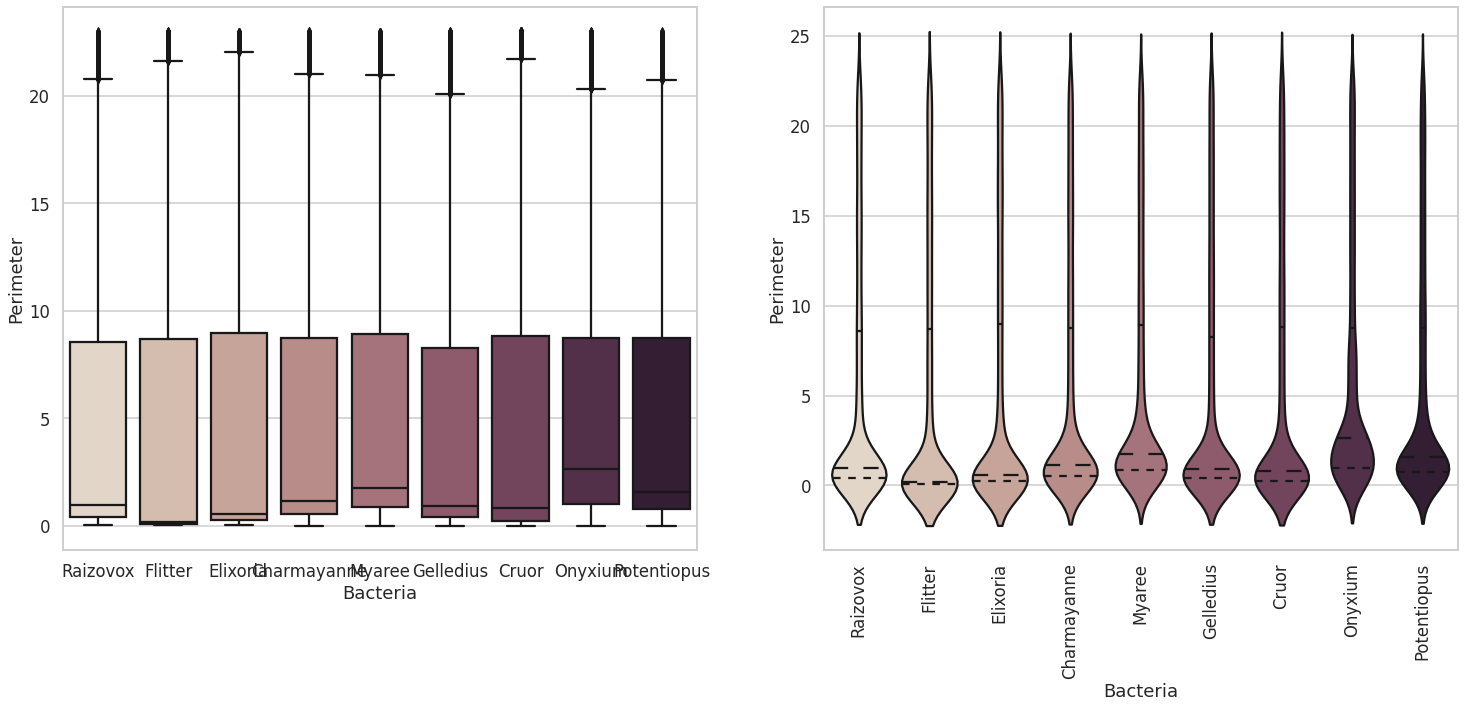

In [13]:
plot_feature(train_df, "Perimeter")

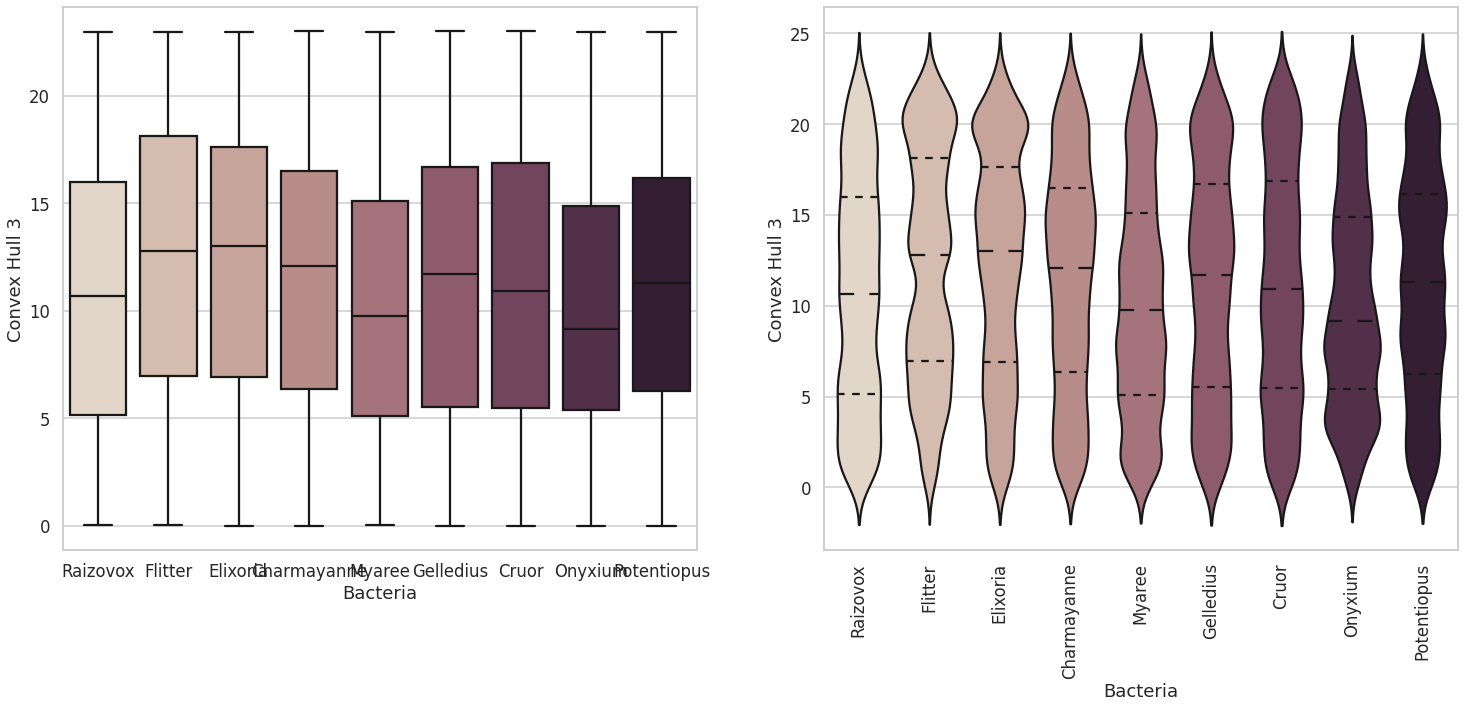

In [14]:
plot_feature(train_df, "Convex Hull 3")

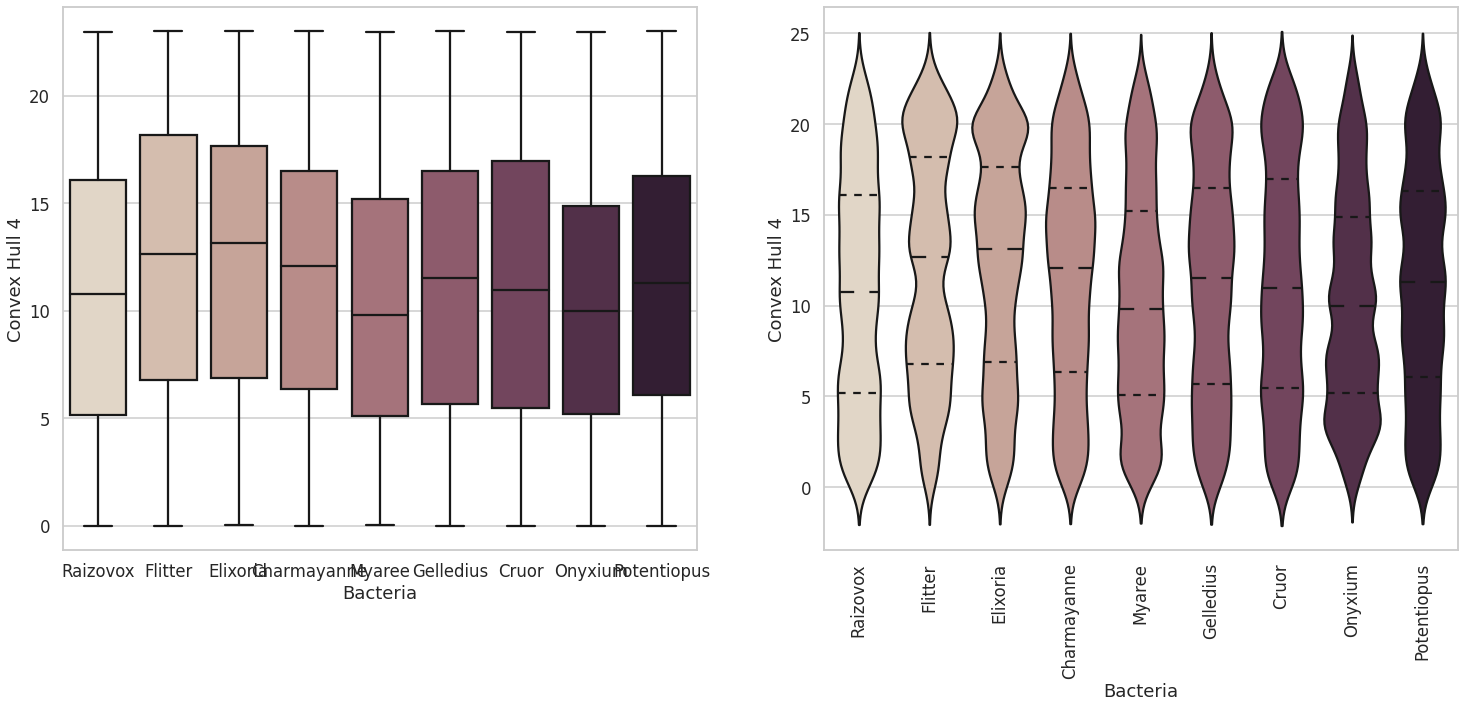

In [15]:
plot_feature(train_df, "Convex Hull 4")

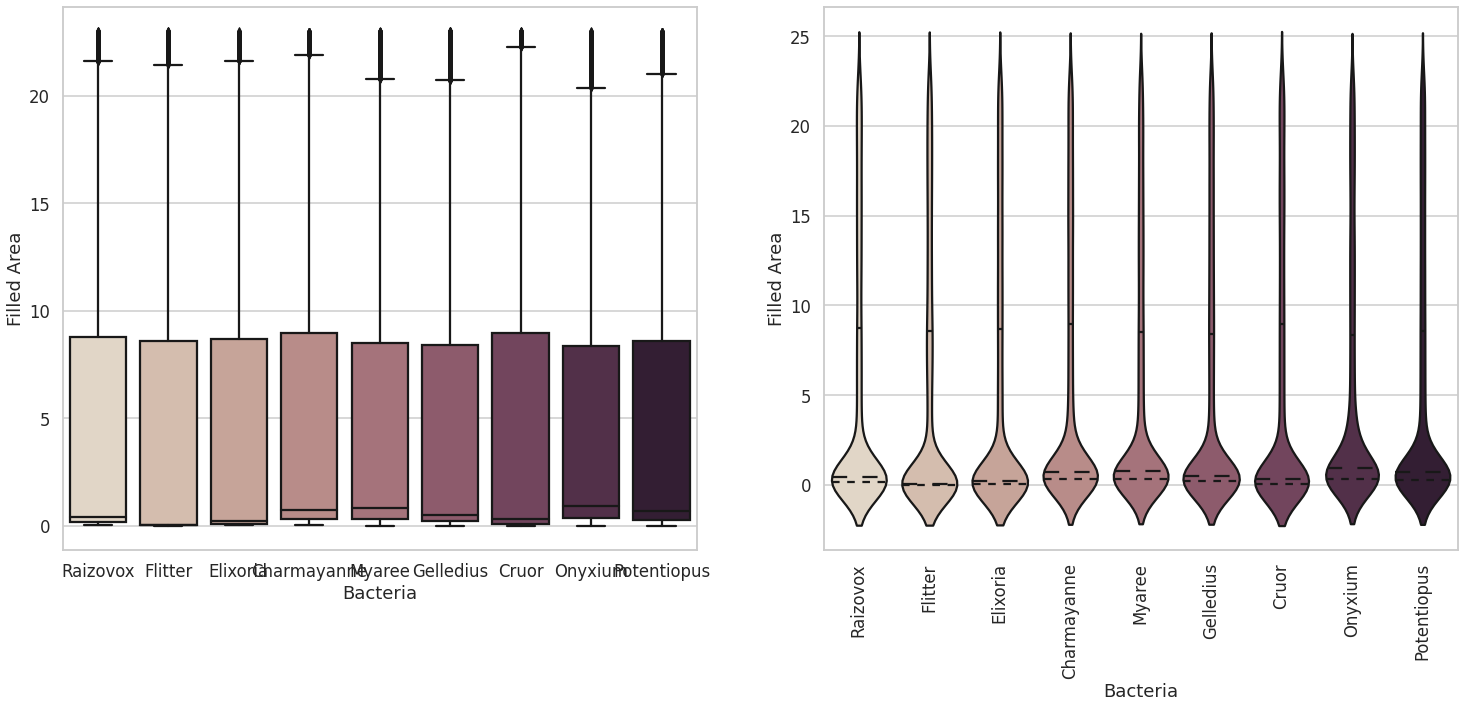

In [16]:
plot_feature(train_df, "Filled Area")

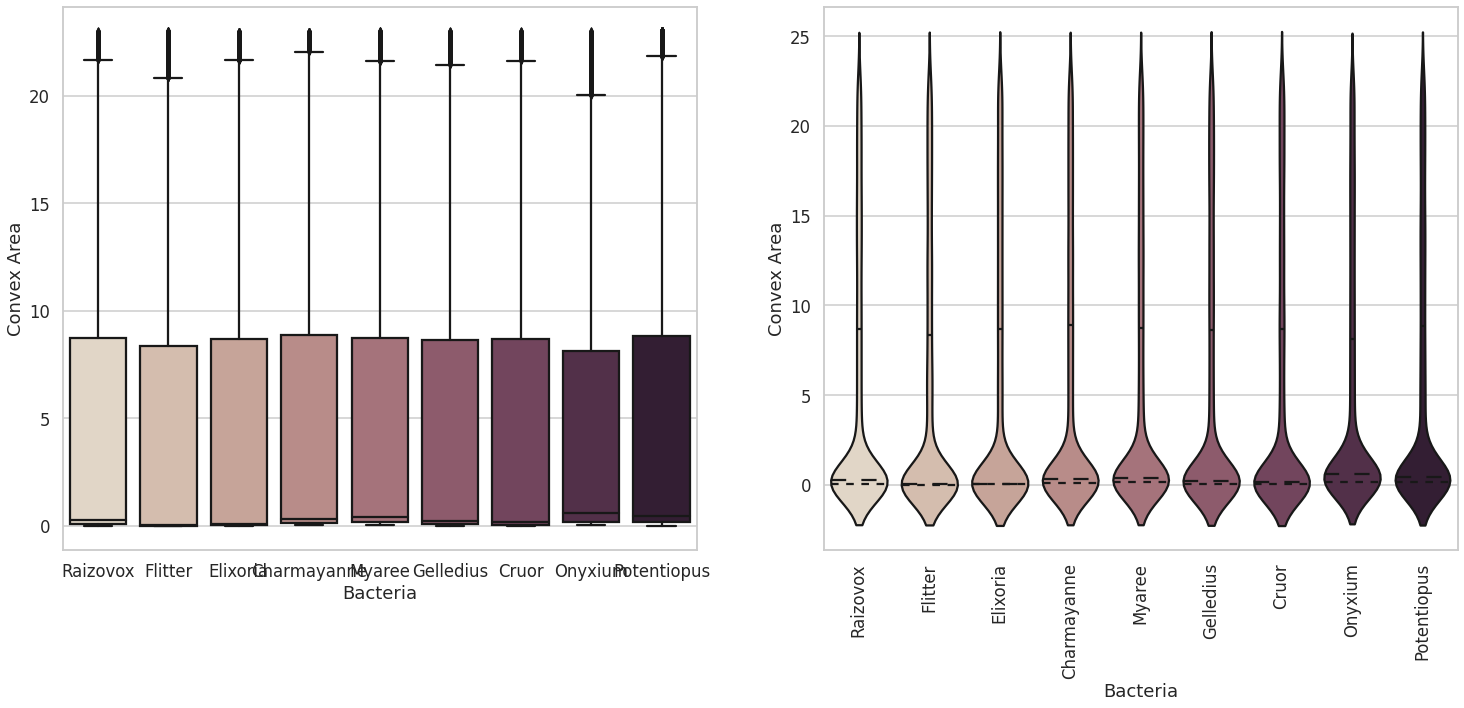

In [17]:
plot_feature(train_df, "Convex Area")

Noticing many features with such common plots and distributions, we need to perform features selection despite the not overwhelming correlation coeffs.

Some pairs we need noticed:

1. Convex Hull 3 and Convex Hull 4
2. Filled Area and Convex Area

In [18]:
from sklearn.model_selection import train_test_split

X = train_df.drop(columns=["Bacteria"]).values
y = train_df["Bacteria"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Standardize the data
# Encode the labels

from sklearn.preprocessing import StandardScaler
scalar_X = StandardScaler()
X_train_scaled = scalar_X.fit_transform(X_train)
X_test_scaled = scalar_X.transform(X_test)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

In [20]:
!pip install statsmodels --upgrade --quiet

In [21]:
#  stepwise feature selection

import statsmodels.api as sm
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    included = list(initial_list)
    while True:
        changed=False

        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded, dtype="float64")
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()


        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()

        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

X_df_scaled = pd.DataFrame(X_train_scaled, columns=train_df.drop(columns=["Bacteria"]).columns)
result = stepwise_selection(X_df_scaled, y_train_encoded)

Add  Compactness                    with p-value 1.11937e-197
Add  Diameter                       with p-value 1.7684e-68
Add  Extent                         with p-value 1.87839e-56
Add  Bordered Area 1                with p-value 7.65883e-48
Add  Convex Hull 3                  with p-value 8.06902e-12
Add  Bordered Area 3                with p-value 5.94604e-08
Add  Convex Hull 1                  with p-value 9.68838e-06
Add  Centroid 2                     with p-value 0.000151453
Add  Equivalent Radius              with p-value 0.000582111
Add  Filled Area                    with p-value 1.20121e-05
Add  Bordered Area 4                with p-value 0.00016689
Add  Convex Hull 2                  with p-value 0.00189285
Add  Bordered Area 2                with p-value 0.00203065
Add  Convex Area                    with p-value 0.00411064


In [22]:
result

['Compactness',
 'Diameter',
 'Extent',
 'Bordered Area 1',
 'Convex Hull 3',
 'Bordered Area 3',
 'Convex Hull 1',
 'Centroid 2',
 'Equivalent Radius',
 'Filled Area',
 'Bordered Area 4',
 'Convex Hull 2',
 'Bordered Area 2',
 'Convex Area']

Seems like we got rid of some of these pairs

In [23]:
keep_train = result + ["Bacteria"]
train_df = train_df[keep_train]
test_df = test_df[result]

In [24]:
from sklearn.model_selection import train_test_split

X = train_df.drop(columns=["Bacteria"]).values
y = train_df["Bacteria"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Redo the preprocessing with the new set of features
from sklearn.preprocessing import StandardScaler
scalar_X = StandardScaler()
X_train_scaled = scalar_X.fit_transform(X_train)
X_test_scaled = scalar_X.transform(X_test)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
grid_rf = GridSearchCV(
        RandomForestClassifier(), 
        param_grid={
            'n_estimators': [50, 60, 70, 80, 90, 100, 150, 200, 500, 1000], 
            'max_depth': [None, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
            },
            cv=5, 
            verbose=1, 
            n_jobs=-1
        )

In [27]:
# grid_rf.fit(X_train_scaled, y_train_encoded)

Creating a new cell with results of grid search for shorter runtime later.
```
n_estimators = 80
max_depth = None
```

In [28]:
forest = RandomForestClassifier(n_estimators=80,random_state=42, verbose=100, n_jobs=-1)
forest.fit(X_train_scaled, y_train_encoded)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
building tree 1 of 80
building tree 2 of 80
building tree 3 of 80[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.6s

building tree 4 of 80[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.6s

building tree 5 of 80[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    1.0s

building tree 6 of 80[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.0s

building tree 7 of 80[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.4s
building tree 8 of 80[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    1.4s


building tree 9 of 80[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    1.8s

building tree 10 of 80[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.9s

building tree 11 of 80[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.2s

building tree 12 of 80[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.3s

building tree 13 of 80[Parallel(

RandomForestClassifier(n_estimators=80, n_jobs=-1, random_state=42, verbose=100)

In [29]:
forest_accuracy = forest.score(X_test_scaled, y_test_encoded)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  11 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  13 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  15 tasks      | elapsed:    0.1s
[Para

In [30]:
print(f"Accuracy of random forest is: {forest_accuracy*100}")

Accuracy of random forest is: 64.00119796346212


In [32]:
# training on the entire dataset
X_scaled = scalar_X.transform(X)
y_encoded = le.transform(y)
forest = RandomForestClassifier(n_estimators=80,random_state=42, verbose=1, n_jobs=-1)
forest.fit(X_train_scaled, y_train_encoded)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   23.3s finished


RandomForestClassifier(n_estimators=80, n_jobs=-1, random_state=42, verbose=1)

In [33]:
X_pred = test_df.values
X_pred_scaled = scalar_X.transform(X_pred)
y_pred_encoded = forest.predict(X_pred_scaled)
y_pred = le.inverse_transform(y_pred_encoded)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done  80 out of  80 | elapsed:    0.4s finished


In [34]:
y_pred[:5]

array(['Flitter', 'Raizovox', 'Cruor', 'Potentiopus', 'Onyxium'],
      dtype=object)

In [35]:
submission = pd.DataFrame(columns=["ID", "Bacteria"])
submission["ID"] = test_df.index
submission["Bacteria"] = y_pred

In [36]:
submission.to_csv("arunachala_final_rf_submission.csv", index=False)

After submitting considered the possibility of high noise, so trying the extra trees classifier as well to see of accuracy matched Random Forest, then it will be a safer bet (Since ETC generally has a lower variance) 

In [37]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
from tqdm.auto import tqdm
etc = ExtraTreesClassifier(
        n_estimators=85,
        n_jobs=-1,
        verbose=0,
        random_state=42
    )

sample_weights = np.ones(len(y_train_encoded))

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = []

for fold, (train_idx, valid_idx) in enumerate(folds.split(X_train_scaled, y_train_encoded)):
    print(f"Fold {fold + 1}")
    X_train, y_train = X_train_scaled[train_idx], y_train_encoded[train_idx]
    X_valid, y_valid = X_train_scaled[valid_idx], y_train_encoded[valid_idx]
    etc.fit(X_train, y_train, sample_weight=sample_weights[train_idx])
    scores.append(etc.score(X_valid, y_valid))
    print(f"Score: {scores[-1]}")
    print()

Fold 1
Score: 0.6426325247079964

Fold 2
Score: 0.6365406214900786

Fold 3
Score: 0.6391613627854736

Fold 4
Score: 0.6459752901535005

Fold 5
Score: 0.6393111194309248



In [38]:
print(f"Accuracy of ETC: {etc.score(X_test_scaled, y_test_encoded)*100}")

Accuracy of ETC: 63.90536088649296


Sort of matches it, so for lesser chance of dropping position in the final leaderboard, I'll be using the ExtraTreesClassifier for my final submission

In [39]:
# fitting on the entire dataset
etc = ExtraTreesClassifier(
        n_estimators=85,
        n_jobs=-1,
        verbose=0,
        random_state=42
    )

etc.fit(X_scaled, y_encoded)

ExtraTreesClassifier(n_estimators=85, n_jobs=-1, random_state=42)

In [40]:
X_pred = test_df.values
X_pred_scaled = scalar_X.transform(X_pred)
y_pred_encoded = etc.predict(X_pred_scaled)
y_pred = le.inverse_transform(y_pred_encoded)

In [41]:
submission = pd.DataFrame(columns=["ID", "Bacteria"])
submission["ID"] = test_df.index
submission["Bacteria"] = y_pred

In [42]:
submission.head()

,ID,Bacteria
0,0,Flitter
1,1,Raizovox
2,2,Cruor
3,3,Potentiopus
4,4,Onyxium


In [43]:
submission.to_csv("arunachala_final_etc_submission.csv", index=False)